In [56]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import operator
import numpy as np
from collections import Counter

In [2]:
labels = [
    "problem identification and resolution",
    "work processes",
    "questioning attitude",
    "continuous learning",
    "personal accountability",
    "respectful work environment",
    "decision making",
    "leadership safety values and actions",
    "effective safety communication",
    "environment for raising concerns"
]

def getTraitCounts(df: pd.DataFrame):
    traitCountsTrue = {}
    traitCountsPredicted = {}
    for label in labels:
        traitCountsTrue[label] = 0
        traitCountsPredicted[label] = 0
    for index, row in df.iterrows():
        true_labels = ast.literal_eval(row["True Labels"])
        pred_labels = ast.literal_eval(row["Predicted Labels"])
        for trueLabel in true_labels:
            traitCountsTrue[trueLabel] = traitCountsTrue.get(trueLabel, 0) + 1
        for predLabel in pred_labels:
            traitCountsPredicted[predLabel] = traitCountsPredicted.get(predLabel, 0) + 1

    trueLabelsToPlot = list(traitCountsTrue.keys())
    trueCountsToPlot = list(traitCountsTrue.values())

    predictedLabelsToPlot = list(traitCountsPredicted.keys())
    predictedCountsToPlot = list(traitCountsPredicted.values())

    predictedMinusTrueCount = map(operator.sub, predictedCountsToPlot, trueCountsToPlot)

    summaryCountDf = pd.DataFrame(data={
        "Labels": trueLabelsToPlot,
        "True Counts": trueCountsToPlot,
        "Predicted Counts": predictedCountsToPlot,
        "Difference Between Predicted & True":  predictedMinusTrueCount
    })
    print(summaryCountDf.to_string(index=False))
    
    fig = go.Figure(data=[go.Bar(
        name = 'True Label Counts',
        x = trueCountsToPlot,
        y = trueLabelsToPlot,
        orientation="h"
    ),
        go.Bar(
        name = 'Predicted Label Counts',
        x = predictedCountsToPlot,
        y = predictedLabelsToPlot,
        orientation="h"
    )
    ])

    # Commented below line but sorts x axis if wanting to dispaly like that, looks cluttered if you do though
    # fig.update_layout(yaxis=dict(autorange="reversed"))
    fig.update_layout(title_text="True/Predicted Label Counts")
    fig.show()

### Few-shot no tuning, no descriptions in prompt (first model)

In [10]:
df1 = pd.read_csv("predictedLabelsFewShotNoTuning.csv")
print('Total samples:', len(df1))
getTraitCounts(df1)

Total samples: 70
                               Labels  True Counts  Predicted Counts  Difference Between Predicted & True
problem identification and resolution           20                60                                   40
                       work processes           42                55                                   13
                 questioning attitude           16                 1                                  -15
                  continuous learning           11                 2                                   -9
              personal accountability           32                15                                  -17
          respectful work environment            1                 0                                   -1
                      decision making           15                 4                                  -11
 leadership safety values and actions            7                 2                                   -5
       effective safety comm

### Zero-shot no training, with descriptions in prompt

In [11]:
df2 = pd.read_csv("ZeroShot_withDescriptions.csv")
print('Total samples:', len(df2))
getTraitCounts(df2)

Total samples: 100
                               Labels  True Counts  Predicted Counts  Difference Between Predicted & True
problem identification and resolution           31                99                                   68
                       work processes           60                99                                   39
                 questioning attitude           20                36                                   16
                  continuous learning           14                 6                                   -8
              personal accountability           46                 5                                  -41
          respectful work environment            1                 0                                   -1
                      decision making           21                 8                                  -13
 leadership safety values and actions           14                 0                                  -14
       effective safety com

### Few-shot, with descriptions in prompt

In [12]:
df3 = pd.read_csv("FewShot_withDescriptions.csv")
print('Total samples:', len(df3))
getTraitCounts(df3)

Total samples: 99
                               Labels  True Counts  Predicted Counts  Difference Between Predicted & True
problem identification and resolution           30                76                                   46
                       work processes           59                70                                   11
                 questioning attitude           20                 2                                  -18
                  continuous learning           14                 4                                  -10
              personal accountability           46                28                                  -18
          respectful work environment            1                 0                                   -1
                      decision making           21                 6                                  -15
 leadership safety values and actions           14                 6                                   -8
       effective safety comm

### Histogram by Power Plant
Using the Few-shot model, with descriptions in prompt

In [71]:
df3 = pd.read_csv("FewShot_withDescriptions.csv")
# df3['Predicted Labels'] = df3['Predicted Labels'].str.replace("'","")
df3.head()

,Power Plant,Sentence/Paragraph,Predicted Labels,True Labels
0,Davis-Besse,"Following unit shutdown on February 16, 2002, ...","['problem identification and resolution', 'wor...","['problem identification and resolution', 'que..."
1,Davis-Besse,The cause of the cracks appears to be high cyc...,['problem identification and resolution'],"['problem identification and resolution', 'que..."
2,Davis-Besse,"These conditions, apparently caused by design ...","['problem identification and resolution', 'wor...","['questioning attitude', 'work processes']"
3,Davis-Besse,The apparent cause of the HPI pump debris tole...,"['problem identification and resolution', 'wor...","['continuous learning', 'questioning attitude'..."
4,Davis-Besse,The previous procedures used to calibrate the ...,"['problem identification and resolution', 'wor...",['work processes']


In [81]:
# Flatten the data and count occurrences of each safety trait
traits_list = [ast.literal_eval(x) for x in df3["Predicted Labels"]]
all_traits = [trait for sublist in traits_list for trait in sublist]
trait_counts = Counter(all_traits)

In [98]:
#COUNTS OF OCCURRENCES
df_Counts = pd.DataFrame()
plants = ['Davis-Besse','South Texas','Diablo Canyon']
df_Counts['Power Plant'] = plants
df_Counts.set_index('Power Plant',inplace=True)

for plant in plants:
    plant_df = df3[df3['Power Plant'] == plant]
    traits_list = [ast.literal_eval(x) for x in plant_df["Predicted Labels"]]
    all_traits = [trait for sublist in traits_list for trait in sublist]
    item_counts = Counter(all_traits)
    for trait, count in item_counts.items():
        df_Counts.at[plant,trait] = int(count)
df_Counts

,problem identification and resolution,work processes,personal accountability,decision making,continuous learning,questioning attitude,effective safety communication,leadership safety values and actions
Power Plant,,,,,,,,
Davis-Besse,15.0,18.0,5.0,1.0,NaN,NaN,NaN,NaN
South Texas,31.0,24.0,9.0,2.0,2.0,2.0,2.0,4.0
Diablo Canyon,30.0,28.0,14.0,3.0,2.0,NaN,NaN,2.0


In [100]:
plant_counts = df3['Power Plant'].value_counts()
plant_counts

Power Plant
Diablo Canyon    40
South Texas      38
Davis-Besse      21
Name: count, dtype: int64

In [101]:
#PERCENTAGE OF OCCURRENCES
for plant in plant_counts.index:
    plant_df = df3[df3['Power Plant'] == plant]
    num_occurrences = len(plant_df)
    traits_list = [ast.literal_eval(x) for x in plant_df["Predicted Labels"]]
    all_traits = [trait for sublist in traits_list for trait in sublist]
    item_counts = Counter(all_traits)
    total_counts = sum(item_counts.values())
    
    # Calculate percentages and assign them to the DataFrame
    percentages = {trait: (count / num_occurrences) * 100 for trait, count in item_counts.items()}
    df_Counts.loc[plant] = percentages
df_Counts

,problem identification and resolution,work processes,personal accountability,decision making,continuous learning,questioning attitude,effective safety communication,leadership safety values and actions
Power Plant,,,,,,,,
Davis-Besse,71.428571,85.714286,23.809524,4.761905,NaN,NaN,NaN,NaN
South Texas,81.578947,63.157895,23.684211,5.263158,5.263158,5.263158,5.263158,10.526316
Diablo Canyon,75.000000,70.000000,35.000000,7.500000,5.000000,NaN,NaN,5.000000


In [104]:
# row_sums = df_Counts.sum(axis=1)
# row_sums

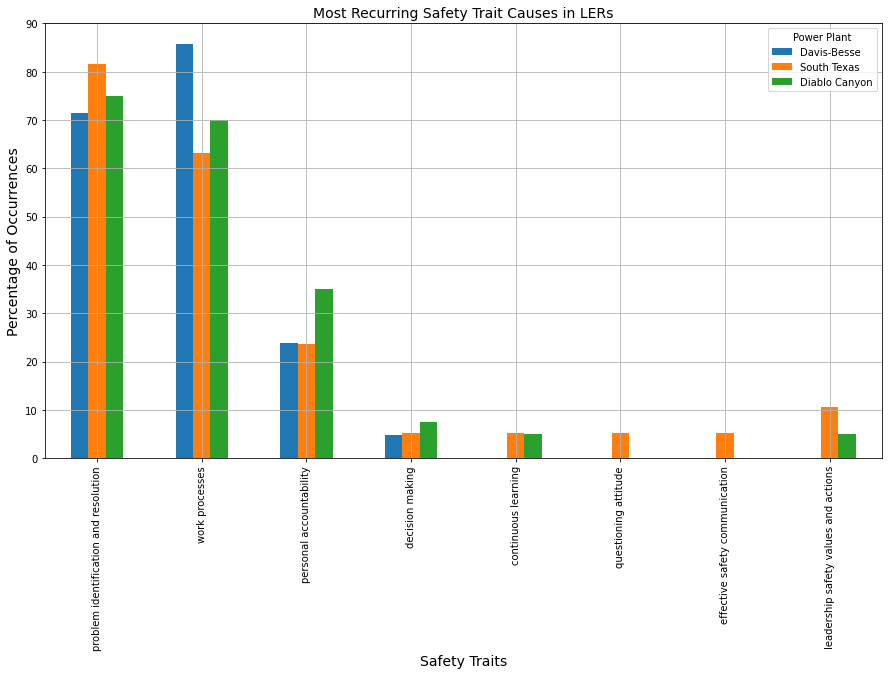

In [103]:
# Transpose the DataFrame
flipped_df = df_Counts.transpose()

# Plot a bar chart with percentages
fig, ax = plt.subplots(figsize=(15, 8))
flipped_df.plot(kind='bar', rot=90, grid=True, ax=ax)
plt.title('Most Recurring Safety Trait Causes in LERs',fontsize=14)
plt.xlabel('Safety Traits',fontsize=14)
plt.ylabel('Percentage of Occurrences',fontsize=14)
plt.show()